In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [144]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
mean = np.mean(X_train, axis=0)
std_deviation = np.std(X_train, axis=0)
X_train = (X_train - mean) / std_deviation

In [145]:
def initialize():
    W1 = np.random.rand(10, 784) * 0.01
    b1 = np.random.rand(10, 1) * 0.01
    W2 = np.random.rand(10, 10) * 0.01
    b2 = np.random.rand(10, 1) * 0.01
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deri(Z):
    return Z > 0
    
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))


def FP(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def BP(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.shape[0]
    temp = np.zeros((Y.size, 10))
    temp[np.arange(Y.size), Y] = 1
    temp = temp.T
    dZ2 = A2 - temp
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deri(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [146]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialize()
    for i in range(iterations):
        Z1, A1, Z2, A2 = FP(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = BP(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
   
def get_predictions(A2):
    return np.argmax(A2, 0)
    # np.argmax(A2, 0) is used to find the indices of the maximum 
    # values along the first axis (axis 0) of the NumPy array A2.

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

  

In [147]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[6 6 6 ... 6 6 6] [0 4 3 ... 2 3 5]
0.10153658536585367
Iteration:  10
[1 1 1 ... 1 1 1] [0 4 3 ... 2 3 5]
0.11151219512195122
Iteration:  20
[0 7 1 ... 1 3 1] [0 4 3 ... 2 3 5]
0.3406829268292683
Iteration:  30
[0 7 7 ... 1 3 3] [0 4 3 ... 2 3 5]
0.3558292682926829
Iteration:  40
[0 4 7 ... 2 3 3] [0 4 3 ... 2 3 5]
0.5351707317073171
Iteration:  50
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.6971219512195121
Iteration:  60
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.770829268292683
Iteration:  70
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.817560975609756
Iteration:  80
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.8423414634146341
Iteration:  90
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.8572926829268293
Iteration:  100
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.8667317073170732
Iteration:  110
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.8739756097560976
Iteration:  120
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.8795853658536585
Iteration:  130
[0 4 8 ... 2 3 5] [0 4 3 ... 2 3 5]
0.8841219512195122
Iteration:  140
[

In [148]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = FP(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("True: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
True:  0


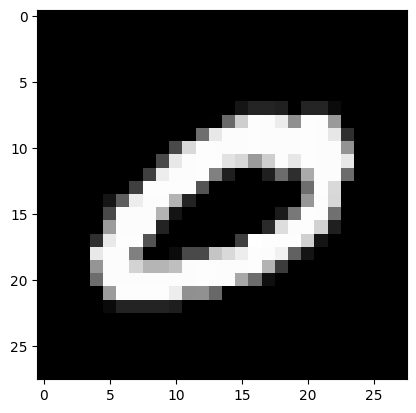

Prediction:  [4]
True:  4


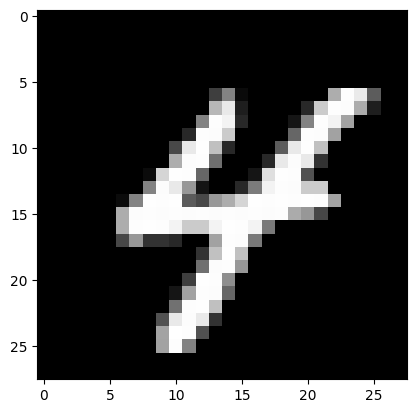

Prediction:  [3]
True:  3


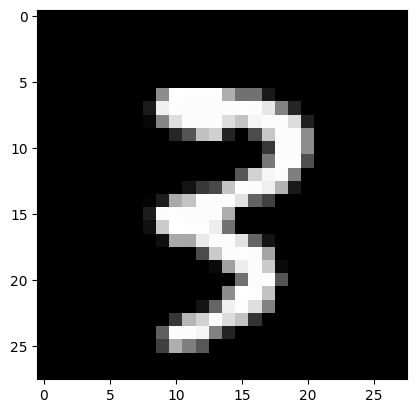

Prediction:  [7]
True:  7


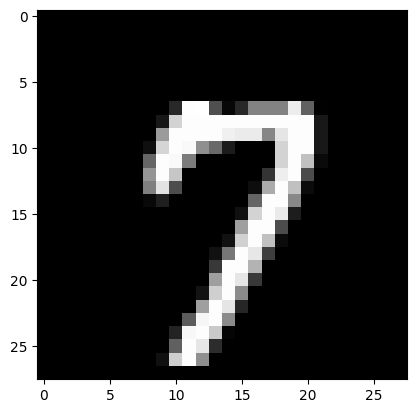

In [149]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [155]:
import csv

file_path = "/kaggle/working/output.csv"
data_to_write = []

test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test = np.array(test).T
number = test.shape[0]
mean = np.mean(test, axis=0)
std_deviation = np.std(test, axis=0)
test = (test - mean) / std_deviation

In [156]:
test.shape

(784, 28000)

In [163]:
res = make_predictions(test, W1, b1, W2, b2)

# Open the CSV file for writing
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(['ImageId', 'Label'])
    
    # Write the data rows
    for i in range(number):
        writer.writerow([f"{i + 1}", f"{res[i]}"])

      